In [1]:
%%HTML 
<style>.container{width:100%;}</style>

Dieses Notebook hängt vom Notebook `Ordered-Sets` ab. Wir unterdrücken beim Ausführen die Ausgabe.

In [2]:
%%capture
%run Ordered-Sets.ipynb

## Anwendungsbeispiel: Sieb des Eratosthenes

Als Anwendungsbeispiel benutzen wir den `SplayTree` als Menge, um alle Primzahlen bis zu einem Maximum abzulegen. Die Primzahlen werden dabei mit dem Sieb des Eratosthenes berechnet. Die Implementierung ist sehr einfach gehalten und hat Raum für Optimierungen, aber das ist für den Vergleich mit `set` unproblematisch.

In [3]:
def splay_primes(n):
    primes = SplayTree()
    for i in range(2, n + 1):
        primes.insert(i)
    for i in range(2, n + 1):
        for j in range(2 * i, n + 1, i):
            if primes.contains(j):
                primes.remove(j)
    return primes

Wir berechnen probeweise die Primzahlen bis 100. Vor dem Anzeigen splayen wir noch an einzelnen Knoten sowie am Median der Primzahlen bis 100, 41. Nach dem Sieb des Eratosthenes ist der Baum sehr unbalanciert, so wird die Anzeige etwas lesefreundlicher.

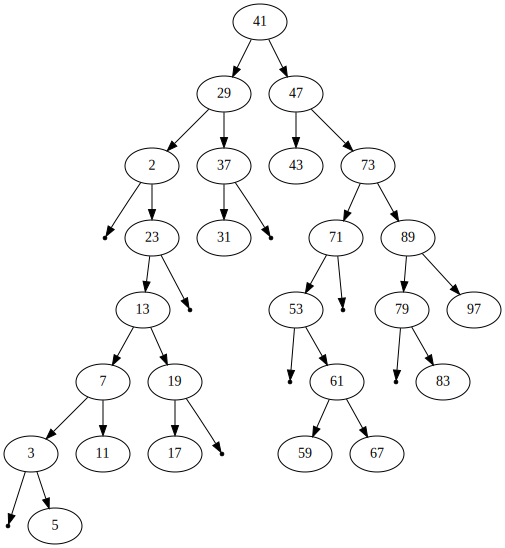

In [4]:
primes = splay_primes(100)
for i in range(0, 100, 25):
    primes.tree = primes.tree._splay(i)
primes.tree = primes.tree._splay(41)
primes.graph()

Wir wiederholen die Implementierung mit dem eingebauten `set`.

In [5]:
def set_primes(n):
    primes = set()
    for i in range(2, n + 1):
        primes.add(i)
    for i in range(2, n + 1):
        for j in range(2 * i, n + 1, i):
            primes -= set([j])
    return primes

In [6]:
print(set_primes(100))

{2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97}


Wir betrachten nun vergleichend die Ausführungszeiten beider Varianten.

In [7]:
# Ignore missing whitespace around operator because this is actually a flag
# Ignore syntax error that flake8 sees due to a compatibility issue
splay_times = %timeit -o splay_primes(10**4)  # noqa: E225, E999
splay_time = splay_times.best
set_times = %timeit -o set_primes(10**4)  # noqa: E225
set_time = set_times.best
if splay_time > set_time:
    print(f"Splaying was {round(splay_time / set_time, 2)} times slower")
else:
    print(f"Splaying was {round(set_time / splay_time, 2)} times faster")

480 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.4 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Splaying was 22.16 times slower


Dabei ist zu beachten, dass wir zu diesem Zeitpunkt die Python-Implementierung mit einer C-Implementierung vergleichen.